# Create AMITT incident visualisations

Many thanks to https://python-graph-gallery.com/91-customize-seaborn-heatmap/

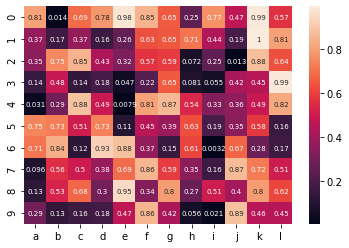

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import generate_amitt_ttps

# Check that heatmap works
df = pd.DataFrame(np.random.random((10,12)), columns=["a","b","c","d","e","f","g","h","i","j","k","l"])
sns.heatmap(df, annot=True, annot_kws={"size": 7})

array([[ 5,  0,  8, 11,  1, 12,  2,  3,  1,  4,  2,  0],
       [ 2,  0,  1,  1,  1,  4,  2,  2,  1,  0,  0,  0],
       [ 0,  0,  1,  0,  3,  4, 10,  0,  2,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1, 10,  0,  2,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  2,  2,  1,  1,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  2,  3,  1,  5,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  4,  3,  1, 14,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  3, 12, 15,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 13,  0,  0,  0]])

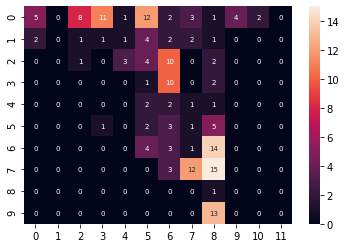

In [8]:
amitt = generate_amitt_ttps.Amitt()
redgrid = amitt.create_padded_framework_table('AMITT Red', 'technique_ids', False)

techcounts = amitt.it[['id_incident','id_technique']].drop_duplicates().groupby('id_technique').count().to_dict()['id_incident']
techlabels = redgrid[2:][:]
nrows = len(techlabels)
ncols = len(techlabels[0])
techgrid = np.zeros([nrows, ncols], dtype = int)

for row in range(nrows):
    for col in range(ncols):
        if techlabels[row][col] in techcounts:
            techgrid[row][col] = techcounts[techlabels[row][col]]

sns.heatmap(techgrid, annot=True, annot_kws={"size": 7})
techgrid

In [6]:
amitt.df_tactics

id                   name phase_id  rank  \
0   TA01     Strategic Planning      P01     1   
1   TA02     Objective Planning      P01     2   
2   TA03         Develop People      P02     3   
3   TA04       Develop Networks      P02     4   
4   TA05         Microtargeting      P02     5   
5   TA06        Develop Content      P02     6   
6   TA07      Channel Selection      P02     7   
7   TA08           Pump Priming      P03     8   
8   TA09               Exposure      P03     9   
9   TA10            Go Physical      P03    10   
10  TA11            Persistence      P03    11   
11  TA12  Measure Effectiveness      P04    12   

                                              summary  \
0   Define the desired end state, i.e. the set of ...   
1   Set clearly defined, measurable, and achievabl...   
2   Develop online and offline users and agents, i...   
3   Develop online and offline communities and tra...   
4          Target very specific populations of people   
5         Create and acquire content used in incident   
6   Set up specific delivery, amplification and ma...   
7   Release content on a targetted small scale, pr...   
8   Release content to general public or push to l...   
9                    Move incident into offline world   
10  Keep incident 'alive', beyond the incident cre...   
11  Measure effectiveness of incident, for use in ...   

                        longname  \
0      TA01 - Strategic Planning   
1      TA02 - Objective Planning   
2          TA03 - Develop People   
3        TA04 - Develop Networks   
4          TA05 - Microtargeting   
5         TA06 - Develop Content   
6       TA07 - Channel Selection   
7            TA08 - Pump Priming   
8                TA09 - Exposure   
9             TA10 - Go Physical   
10            TA11 - Persistence   
11  TA12 - Measure Effectiveness   

                                        technique_ids  \
0                        [T0001, T0002, T0003, T0004]   
1                                      [T0005, T0006]   
2                               [T0007, T0008, T0009]   
3          [T0010, T0011, T0012, T0013, T0014, T0015]   
4                               [T0016, T0017, T0018]   
5   [T0019, T0020, T0021, T0022, T0023, T0024, T00...   
6   [T0029, T0030, T0031, T0032, T0033, T0034, T00...   
7   [T0039, T0040, T0041, T0042, T0043, T0044, T00...   
8   [T0047, T0048, T0049, T0050, T0051, T0052, T00...   
9                                      [T0057, T0061]   
10                              [T0058, T0059, T0060]   
11                              [T0062, T0063, T0064]   

                                          counter_ids  
0   [C00006, C00008, C00010, C00012, C00013, C0001...  
1   [C00009, C00011, C00028, C00029, C00030, C0003...  
2   [C00034, C00036, C00040, C00042, C00044, C0004...  
3   [C00047, C00052, C00053, C00056, C00059, C0006...  
4                            [C00065, C00066, C00216]  
5   [C00014, C00032, C00071, C00072, C00074, C0007...  
6   [C00097, C00098, C00099, C00100, C00101, C0010...  
7   [C00112, C00113, C00114, C00115, C00116, C0011...  
8   [C00089, C00122, C00123, C00124, C00125, C0012...  
9                                    [C00129, C00130]  
10  [C00131, C00133, C00135, C00136, C00137, C0013...  
11           [C00090, C00140, C00147, C00148, C00149]

In [9]:
amitt.it

id                                               name summary  \
0    I00002T001                                buy FB targeted ads           
1    I00005T003                               Targeted FB paid ads           
2    I00017T004                               Targeted FB paid ads           
3    I00002T002                         Promote "funding" campaign           
4    I00002T003            create web-site - information pollution           
..          ...                                                ...     ...   
181  I00044T008  Promote fake “experts” with impressive (and sc...           
182  I00047T003  (Distort) Kremlin-controlled RT cited Russian ...           
183  I00053T002  Distorted, saccharine “news” about the Chinese...           
184  I00056T005  Memes... anti-Isreal/USA/West, conspiracy narr...           
185  I00056T006                      Fake news/synthetic web-sites           

    id_incident              name_incident id_technique  \
0        I00002               #VaccinateUS        T0018   
1        I00005                Brexit vote        T0018   
2        I00017  US presidential elections        T0018   
3        I00002               #VaccinateUS        T0017   
4        I00002               #VaccinateUS        T0019   
..          ...                        ...          ...   
181      I00044          JadeHelm exercise        T0009   
182      I00047                Sea of Azov        T0023   
183      I00053    China Huawei CFO Arrest        T0023   
184      I00056  Iran Influence Operations        T0022   
185      I00056  Iran Influence Operations        T0008   

                         name_technique  
0                     Paid targeted ads  
1                     Paid targeted ads  
2                     Paid targeted ads  
3                Promote online funding  
4        Generate information pollution  
..                                  ...  
181                 Create fake experts  
182                       Distort facts  
183                       Distort facts  
184               Conspiracy narratives  
185  Create fake or imposter news sites  

[186 rows x 7 columns]

In [11]:
import tkinter as Tk
import numpy as np

class Begueradj(Tk.Frame):
   def __init__(self,parent):
      Tk.Frame.__init__(self, parent)
      self.parent = parent
      self.initialize()

   def initialize(self):
      '''
      Draw the GUI
      '''
      self.parent.title("RUN ON START TEST")       
      self.parent.grid_rowconfigure(1,weight=1)
      self.parent.grid_columnconfigure(1,weight=1)

      self.frame = Tk.Frame(self.parent)  
      self.frame.pack(fill=Tk.X, padx=5, pady=5)

      # Create a 6x7 array of zeros as the one you used
      self.a = np.zeros((6,7))
      for i in range(0,self.a.shape[0]):
          for j in range(0,self.a.shape[1]):
               self.b = Tk.Button(self.frame, text = 'Hello')
               self.b.grid(row=i,  column= j)

# Start the main program here               
if __name__ == "__main__": 
   root=Tk.Tk()
   app = Begueradj(root)   
   root.mainloop()

In [14]:
ct = amitt.cross_counterid_techniqueid
ct[ct['technique_id'] != '']

id technique_id
1    C00008         TA01
1    C00008         TA06
1    C00008         TA08
1    C00008        T0006
1    C00008        T0009
..      ...          ...
120  C00165       T00025
126  C00174        T0001
138  C00197        T0007
138  C00197        T0011
140  C00202        T0025

[263 rows x 2 columns]

In [17]:
ct[(ct['id'] == 'C00197') & (ct['technique_id'].isin(['T0002', 'T0007']))]

id technique_id
138  C00197        T0007

In [18]:
ct = ct[ct['technique_id'].isin(amitt.df_techniques['id'].to_list()) & ct['id'].isin(amitt.df_counters['id'].to_list())]
ct

id technique_id
1    C00008        T0006
1    C00008        T0009
1    C00008        T0008
1    C00008        T0013
1    C00008        T0014
..      ...          ...
108  C00149        T0020
126  C00174        T0001
138  C00197        T0007
138  C00197        T0011
140  C00202        T0025

[190 rows x 2 columns]

In [19]:
technique_id_list = ['T0007', 'T0008', 'T0022', 'T0023', 'T0043', 'T0052', 'T0036', 'T0037', 'T0038']
counter_id_list = ['C00009', 'C00008', 'C00042', 'C00030', 'C00093', 'C00193', 'C00073', 'C000197', 'C00174', 'C00205']
possible_counters_for_techniques = ct[ct['technique_id'].isin(technique_id_list)] 
possible_techniques_for_counters = ct[ct['technique_id'].isin(counter_id_list)] 
coverage = ct[(ct['id'].isin(counter_id_list)) & (ct['technique_id'].isin(technique_id_list))]
coverage

id technique_id
1   C00008        T0008
24  C00042        T0022